In [68]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [69]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [70]:
import pandas as pd

car_df = pd.read_csv('CarPrice_Assignment.csv')
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [71]:
BrandName = car_df['CarName'].apply(lambda x : x.split(' ')[0])
car_df.insert(3,"BrandName",BrandName)
car_df.drop(['CarName'],axis=1,inplace=True)
car_df.head()

,car_ID,symboling,BrandName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [72]:
#dealing with wrong spellings

def replace_Names(name1,name2):
    car_df['BrandName'].replace(name1,name2,inplace=True);

replace_Names('maxda','mazda');
replace_Names('Nissan','nissan');
replace_Names('porcshce','porsche');
replace_Names('toyouta','toyota');
replace_Names('vokswagen','volkswagen');
replace_Names('vw','volkswagen');

In [73]:
# standardizing our target variable
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

car_df['price'] = scaler.fit_transform(car_df[['price']])
car_df

,car_ID,symboling,BrandName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0.027391
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0.404461
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,0.404461
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,0.084485
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,0.447752
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,0.723810
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,1.029983
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,1.153582


In [74]:
car_df.price

0      0.027391
1      0.404461
2      0.404461
3      0.084485
4      0.523668
         ...   
200    0.447752
201    0.723810
202    1.029983
203    1.153582
204    1.173031
Name: price, Length: 205, dtype: float64

In [75]:
numerical_columns_df = car_df.select_dtypes(exclude='object')
numerical_columns_df.drop('car_ID', axis=1)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0.027391
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0.404461
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0.404461
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0.084485
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,0.447752
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,0.723810
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,1.029983
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,1.153582


# Models without PCA

In [214]:
# we have to turn our pandas DataFrame to numpy arrays
X = numerical_columns_df.iloc[:,:15].values
y = numerical_columns_df.iloc[:,15:16].values

# Architecture

In [239]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.155, random_state=11111)

In [240]:
from tensorflow.keras.layers import Dense

input_number = X_train.shape[1] 

model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(input_number,), name = "Hidden_Layer_1"))

In [241]:
model.add(Dense(8, activation='relu', name = "Hidden_Layer_2"))

In [242]:
model.add(Dense(1, name = "Output"))

In [243]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                256       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# Compiling

In [244]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fitting with 1000 epochs

In [245]:
model.fit(X_train, y_train, epochs=1000, verbose=0)

# Measuring

In [246]:
mae_train = model.evaluate(X_train, y_train, verbose = 0)[1]
mae_test = model.evaluate(X_test, y_test, verbose = 0)[1]

print("\nMAE for train set : {:.3f}".format(mae_train))
print("MAE for test set    : {:.3f}".format(mae_test))


MAE for train set : 0.926
MAE for test set    : 1.097


**APPLY BELOW HIDDEN CODES IF NECESSARY**

# Another 500 epochs

In [235]:
model.fit(X_train, y_train, epochs=500, verbose=0)

# Measuring

In [236]:
mae_train = model.evaluate(X_train, y_train, verbose = 0)[1]
mae_test = model.evaluate(X_test, y_test, verbose = 0)[1]

print("\nMAE for train set : {:.3f}".format(mae_train))
print("MAE for test set    : {:.3f}".format(mae_test))


MAE for train set : 3.833
MAE for test set    : 3.628


# Plotting

In [247]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

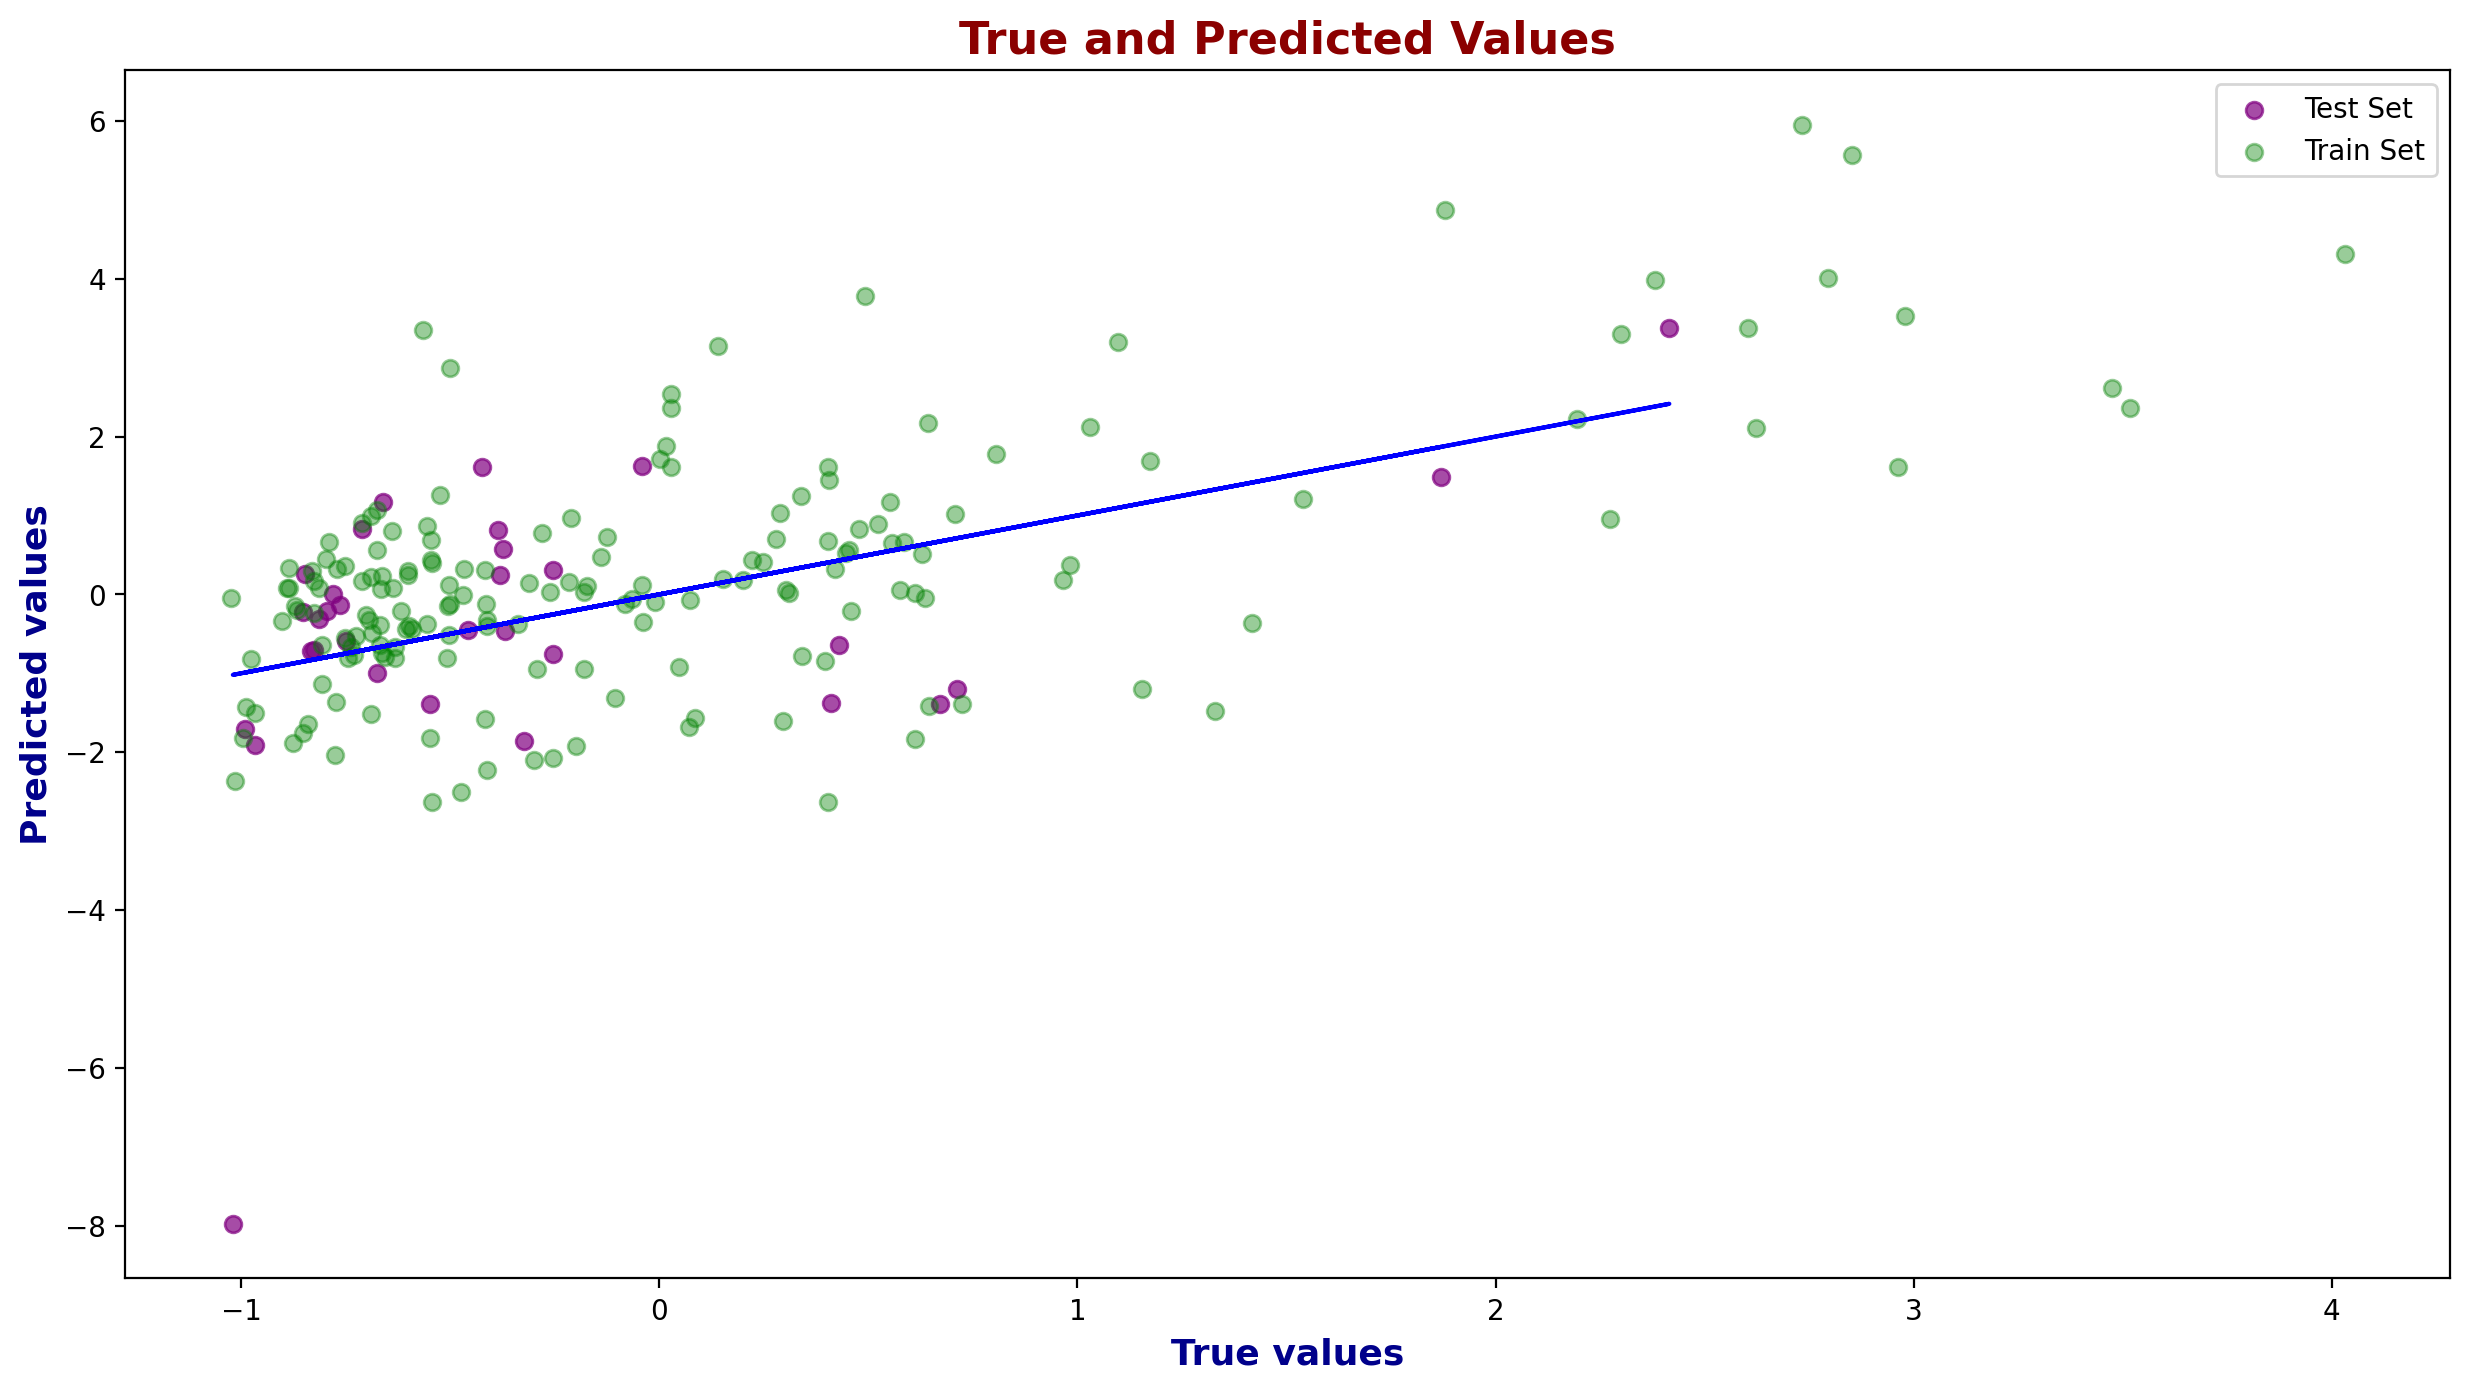

In [248]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8), dpi=200)
ax1 = plt.scatter(y_test,pred_test,alpha=0.7,color="purple", )
ax2 = plt.scatter(y_train,pred_train,alpha=0.4,color="green")
ax3 = plt.plot(y_test,y_test,color="blue")
plt.xlabel("True values", color = "darkblue", fontsize=13, fontweight='bold')
plt.ylabel("Predicted values", color = "darkblue", fontsize=13, fontweight='bold' )
plt.title("True and Predicted Values", color = "darkred", 
          fontsize=16, fontweight='bold' )
plt.legend([ax1,ax2], ["Test Set", 'Train Set'])
plt.show()

# Model with PCA

In [260]:
# since I know the first 3 PC's from the project, I'll use them

new_numerical_columns_df = numerical_columns_df[['carwidth','enginesize','horsepower', 'price']]

In [261]:
# we have to turn our pandas DataFrame to numpy arrays
X = new_numerical_columns_df.iloc[:,:3].values
y = new_numerical_columns_df.iloc[:,3:4].values


# Architecture

In [262]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.155, random_state=11111)

In [263]:
from tensorflow.keras.layers import Dense

input_number = X_train.shape[1] 

model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(input_number,), name = "Hidden_Layer_1"))

In [264]:
model.add(Dense(8, activation='relu', name = "Hidden_Layer_2"))

In [265]:
model.add(Dense(1, name = "Output"))

In [266]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                64        
                                                                 
 Hidden_Layer_2 (Dense)      (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


# Compiling

In [267]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fitting with 1000 epochs

In [268]:
model.fit(X_train, y_train, epochs=1000, verbose=0)

# Measuring

In [269]:
mae_train = model.evaluate(X_train, y_train, verbose = 0)[1]
mae_test = model.evaluate(X_test, y_test, verbose = 0)[1]

print("\nMAE for train set : {:.3f}".format(mae_train))
print("MAE for test set    : {:.3f}".format(mae_test))


MAE for train set : 0.386
MAE for test set    : 0.324


**APPLY BELOW HIDDEN CODES IF NECESSARY**

# Another 500 epochs

In [259]:
model.fit(X_train, y_train, epochs=500, verbose=0)

# Measuring

In [ ]:
mae_train = model.evaluate(X_train, y_train, verbose = 0)[1]
mae_test = model.evaluate(X_test, y_test, verbose = 0)[1]

print("\nMAE for train set : {:.3f}".format(mae_train))
print("MAE for test set    : {:.3f}".format(mae_test))


MAE for train set : 0.922
MAE for test set    : 0.846


# Plotting

In [270]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

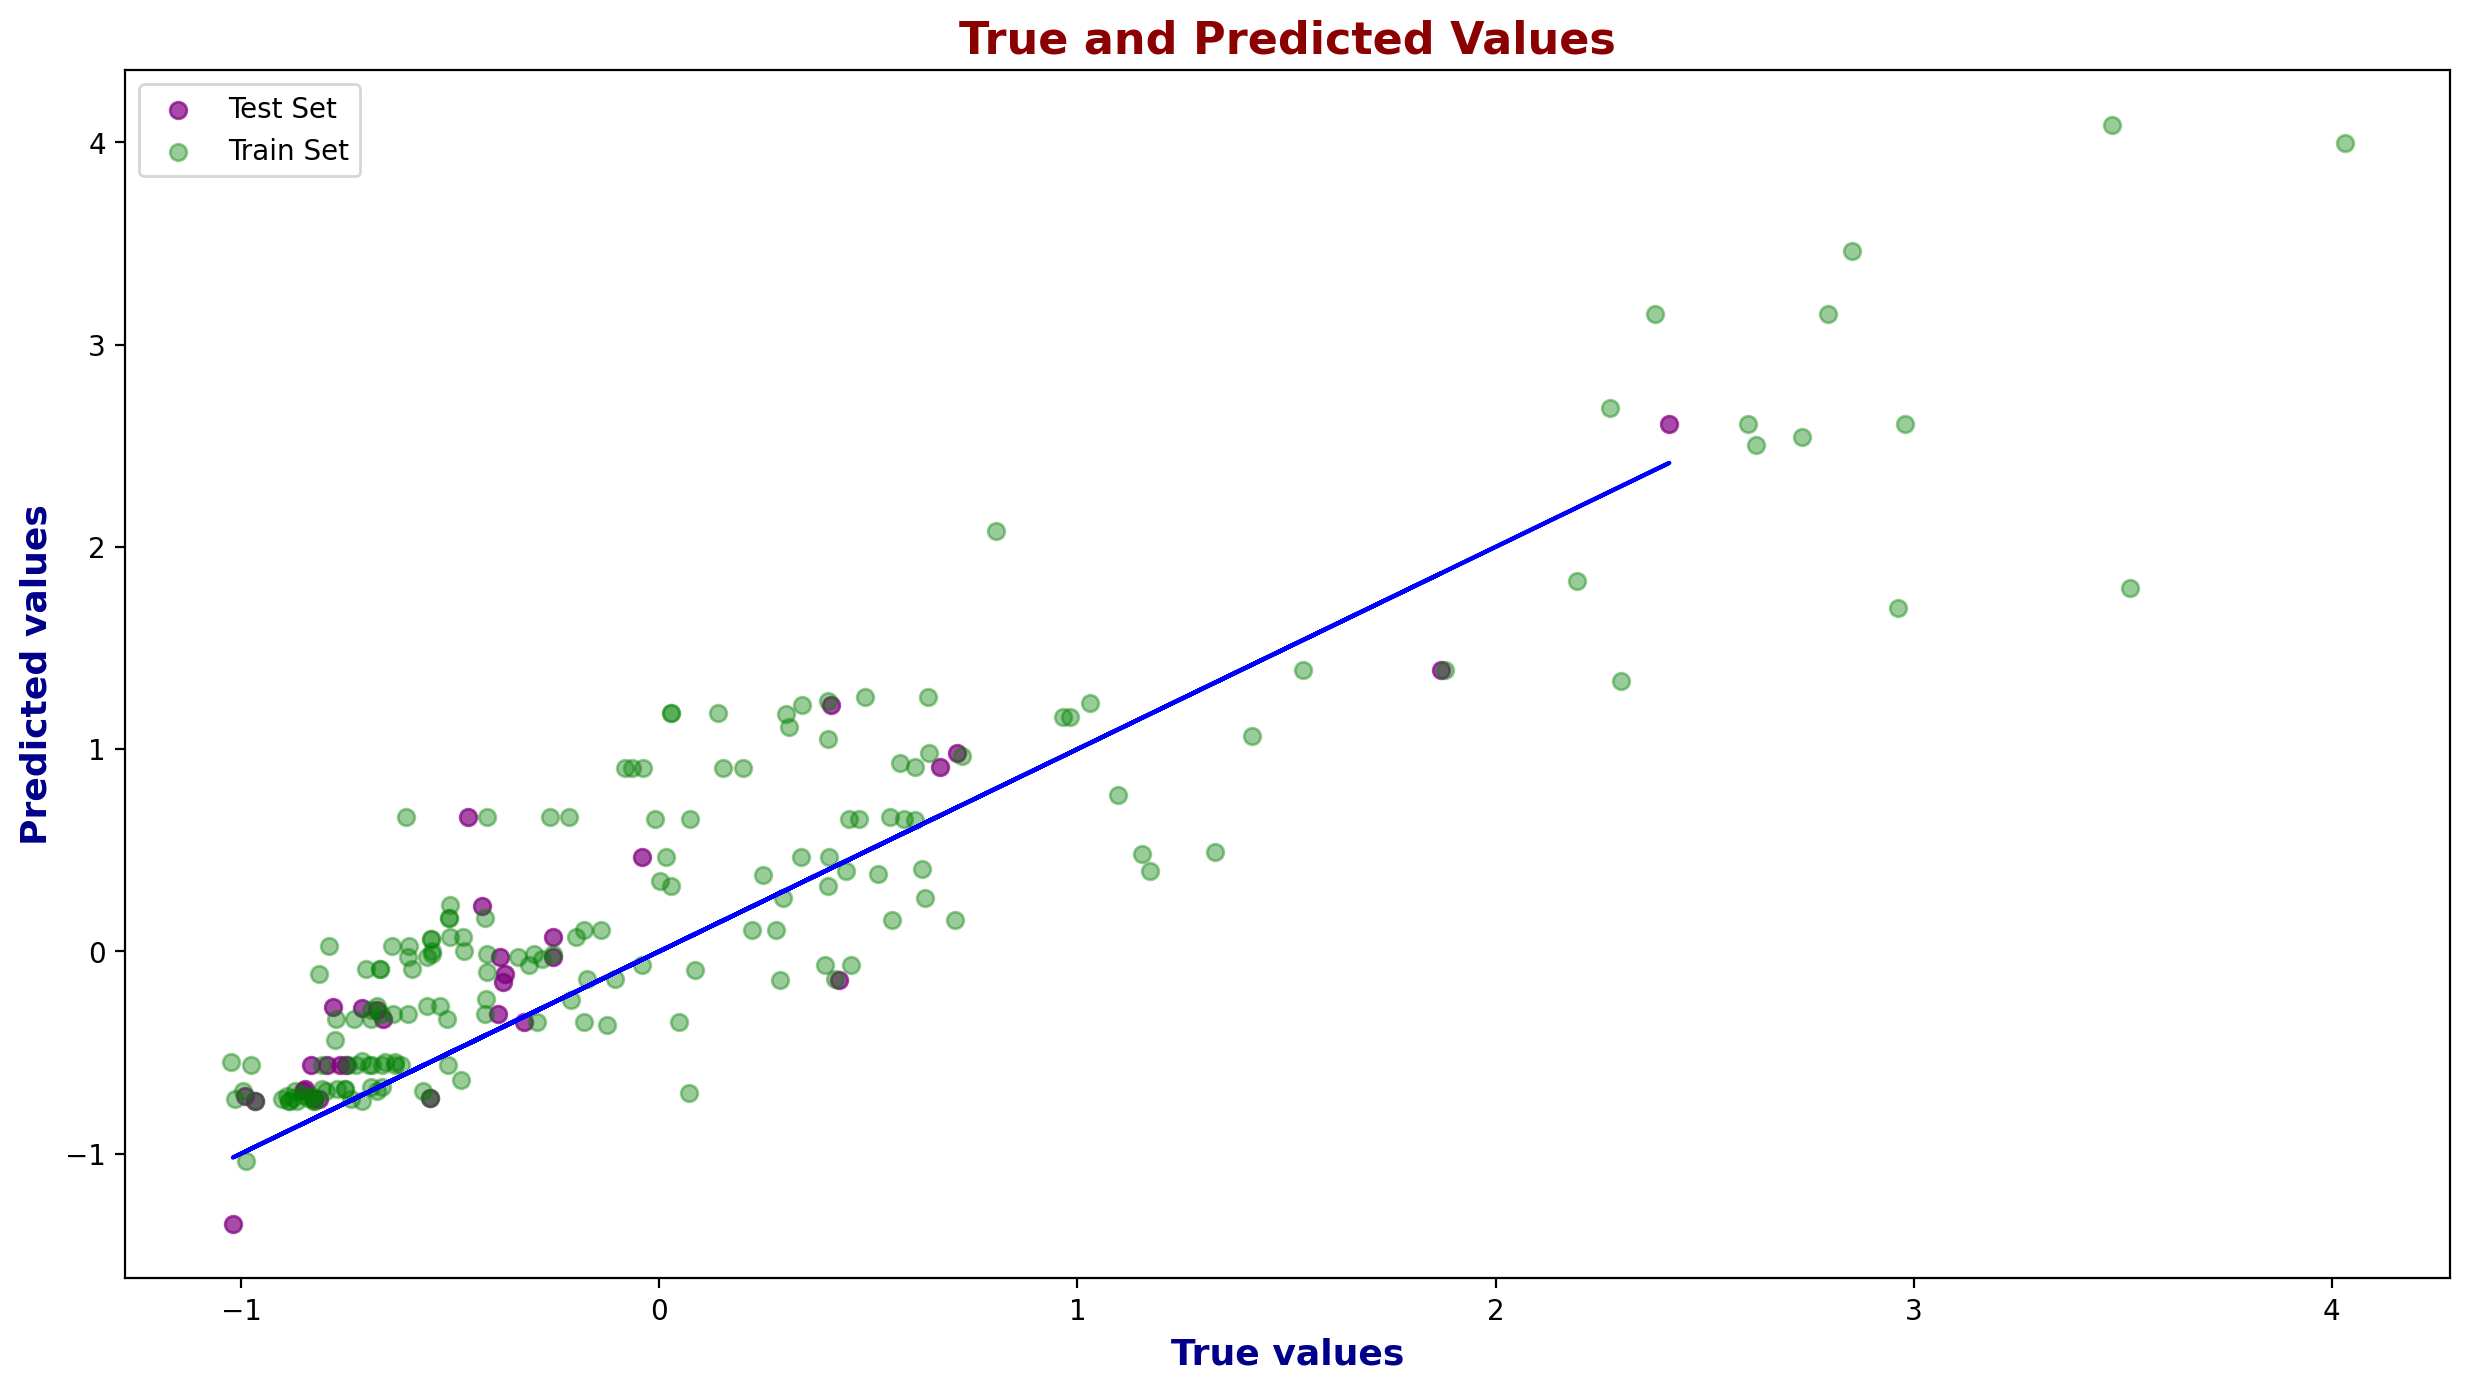

In [271]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8), dpi=200)
ax1 = plt.scatter(y_test,pred_test,alpha=0.7,color="purple", )
ax2 = plt.scatter(y_train,pred_train,alpha=0.4,color="green")
ax3 = plt.plot(y_test,y_test,color="blue")
plt.xlabel("True values", color = "darkblue", fontsize=13, fontweight='bold')
plt.ylabel("Predicted values", color = "darkblue", fontsize=13, fontweight='bold' )
plt.title("True and Predicted Values", color = "darkred", 
          fontsize=16, fontweight='bold' )
plt.legend([ax1,ax2], ["Test Set", 'Train Set'])
plt.show()

# Conclusion

PCA'd version worked better.